In [1]:
import os
import configparser

import pandas as pd
import numpy as np
import requests
import geopandas as gpd
from shapely.geometry import Point, Polygon

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.lines import Line2D

In [2]:
#set filepaths
project_root = os.path.abspath(os.getcwd())
root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
config_file =  os.path.join(root, "config.cfg")

# geodata for shapefiles
config = configparser.ConfigParser()
config.read(config_file)
gdata_root = config["geodata"]["path"]

# set custom font
plt.rcParams["font.family"] = ["FreeSans"]
from matplotlib import font_manager
#title_font = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\Dog Rough.otf')

## Load data

In [32]:
# Postcode district shapefiles
gdf = gpd.GeoDataFrame.from_file(os.path.join(gdata_root, "uk-postcodes\\LondonPostcodeDistricts_polygons_clipped.geojson"))
gdf = gdf.rename(columns={"Name": "PostcodeDistrict"}).to_crs("32630")

# dogs per district
dogs = pd.read_csv("APHA0381-Dogs_Per_HouseholdDJ.csv")

# cat population per district
cats = pd.read_csv("APHA0372-Cat_Density_Postcode_District+cm.csv")
households = pd.read_csv("pcdd_p004.csv").rename(columns={"Postcode Districts": "PostcodeDistrict"})
cats = pd.merge(cats, households, on="PostcodeDistrict", how="left")

# calculate cats per household
cats["CatsPerHousehold"] = cats["EstimatedCatPopulation"]/cats["Count"]

# merge
merged = pd.merge(pd.merge(gdf, dogs, on="PostcodeDistrict", how="left"), cats, on="PostcodeDistrict", how="left")

In [47]:
# remove districts with less than 10 households as prone to outliers
_filter = (merged["Count"].isna()) | (merged["Count"]<10)
merged["DogsPerHousehold_clean"] = merged["DogsPerHousehold"]
merged.loc[_filter, "DogsPerHousehold_clean"] = np.nan 
merged["CatsPerHousehold_clean"] = merged["CatsPerHousehold"]
merged.loc[_filter, "CatsPerHousehold_clean"] = np.nan 

# create diff

merged["diff"] = merged["CatsPerHousehold_clean"] - merged["DogsPerHousehold_clean"]
merged["ratio"] = merged["CatsPerHousehold_clean"]/ merged["DogsPerHousehold_clean"]

In [50]:
0.4/0.2

2.0

<Axes: >

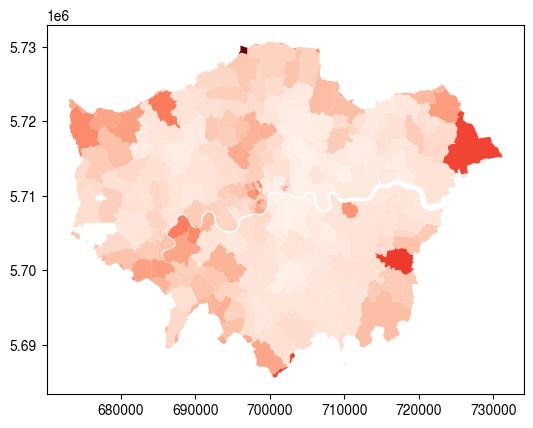

In [39]:
merged.plot(column="DogsPerHousehold_clean", cmap="Reds")